# Program - 

**Purpose**

Plot cn_map for TOA Sw_up in the NE Pacific region
1. CERES July climatology
2. TaiESM1 AMIP July climatology
3. TaiESM1 coupled July climatology
4. CERES July 2001
5. TaiESM1 hindcast Day 1
6. TaiESM1 hindcast Day 3

**Author:** Yi-Hsuan Chen (yihsuan@umich.edu)

**Date:** 
February 2025

**Reference program:**



In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import io, os, sys, types

import yhc_module as yhc
#import read_data_big as read_data    ## on my Mac

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

# Read data

## CERES-EBAF

In [51]:
datapath_ceres = "/lfs/home/yihsuanc/data/data.CERES/2001-2023/"
data_ceres = datapath_ceres + "CERES_EBAF_Ed4.2_Subset_200101-202312_TOA_CLD.nc"

# Load dataset (replace with actual file path or dataset)
ds_ceres = xr.open_dataset(data_ceres)

# Ensure time is in datetime format
ds_ceres['time'] = xr.decode_cf(ds_ceres)['time']

# Select all July data
#ds_ceres_july = ds_ceres.sel(time=ds_ceres.time.dt.month == 7)

# Compute July climatology (mean over all years)
ds_ceres_ann_climo = ds_ceres.mean(dim="time")

#ds_ceres_ann_climo

## CERES-SYN1deg

In [52]:
#ds_ceres_july_2001

## TaiESM1 - AMIP

### rsut

In [53]:
datapath_taiesm1_amip = "/lfs/archive/CMIP6/TaiESM1/amip-hist/atmos/mon/r1i1p1f1/"
fnames = [
    "rsut_Amon_TaiESM1_amip-hist_r1i1p1f1_gn_197901-201012.nc",
    "rsut_Amon_TaiESM1_amip-hist_r1i1p1f1_gn_201101-201412.nc",
                 ]

fnames = [datapath_taiesm1_amip+file1 for file1 in fnames]
ds_taiesm1_amip = xr.open_mfdataset(fnames)

# Ensure time is in datetime format
ds_taiesm1_amip['time'] = xr.decode_cf(ds_taiesm1_amip)['time']

# Select all July data
#ds_taiesm1_amip_july_rsut = ds_taiesm1_amip.sel(time=ds_taiesm1_amip.time.dt.month == 7)

# Compute July climatology (mean over all years)
ds_taiesm1_amip_ann_climo_rsut = ds_taiesm1_amip.mean(dim="time")

# Extract July 2001 data
#ds_taiesm1_amip_july_2001 = ds_taiesm1_amip.sel(time=(ds_taiesm1_amip.time.dt.year == 2001) & (ds_taiesm1_amip.time.dt.month == 7))

#ds_taiesm1_amip_ann_climo_rsut

In [54]:
#ds_taiesm1_amip_climo_rsut

### rsutcs

In [55]:
datapath_taiesm1_amip = "/lfs/archive/CMIP6/TaiESM1/amip-hist/atmos/mon/r1i1p1f1/"
fnames_rsutcs = [
    "rsutcs_Amon_TaiESM1_amip-hist_r1i1p1f1_gn_197901-201012.nc",
    "rsutcs_Amon_TaiESM1_amip-hist_r1i1p1f1_gn_201101-201412.nc",
                 ]

fnames_rsutcs = [datapath_taiesm1_amip+file1 for file1 in fnames_rsutcs]
ds_taiesm1_amip_rsutcs = xr.open_mfdataset(fnames_rsutcs)

# Ensure time is in datetime format
ds_taiesm1_amip_rsutcs['time'] = xr.decode_cf(ds_taiesm1_amip)['time']

# Select all July data
#ds_taiesm1_amip_july_rsutcs = ds_taiesm1_amip_rsutcs.sel(time=ds_taiesm1_amip.time.dt.month == 7)
ds_taiesm1_amip_ann_climo_rsutcs = ds_taiesm1_amip_rsutcs.mean(dim="time")


# Compute July climatology (mean over all years)
#ds_taiesm1_amip_climo_rsutcs = ds_taiesm1_amip_july_rsutcs.mean(dim="time")

# Extract July 2001 data
#ds_taiesm1_amip_july_2001 = ds_taiesm1_amip.sel(time=(ds_taiesm1_amip.time.dt.year == 2001) & (ds_taiesm1_amip.time.dt.month == 7))

#ds_taiesm1_amip_ann_climo_rsutcs

In [56]:
#ds_taiesm1_amip_climo_rsutcs

## TaiESM1 - hist

### rsut

In [57]:
datapath_taiesm1_hist = "/lfs/archive/CMIP6/TaiESM1/historical/atmos/mon/r1i1p1f1/"
fnames = datapath_taiesm1_hist+"rsut_Amon_TaiESM1_historical_r1i1p1f1_gn_185001-201412.nc"

ds_taiesm1_hist = xr.open_mfdataset(fnames)

# Ensure time is in datetime format
ds_taiesm1_hist['time'] = xr.decode_cf(ds_taiesm1_hist)['time']

# Select all July data
#ds_taiesm1_hist_ann = ds_taiesm1_hist #.sel(time=ds_taiesm1_hist.time.dt.month == 7)

# Select July data from 1979 to 2014
ds_taiesm1_hist_ann_1979_2014 = ds_taiesm1_hist.sel(time=(ds_taiesm1_hist.time.dt.year >= 1979) & 
                                     (ds_taiesm1_hist.time.dt.year <= 2014)) 
                                     

# Compute July climatology (mean over all years)
#ds_taiesm1_hist_ann_climo_rsut = ds_taiesm1_hist_ann.mean(dim="time")

# Compute July climatology (1979-2014)
ds_taiesm1_hist_36y_rsut = ds_taiesm1_hist_ann_1979_2014.mean(dim="time")

#ds_taiesm1_hist_36y_rsut

### rsutcs

In [58]:
datapath_taiesm1_hist = "/lfs/archive/CMIP6/TaiESM1/historical/atmos/mon/r1i1p1f1/"
fnames = datapath_taiesm1_hist+"rsutcs_Amon_TaiESM1_historical_r1i1p1f1_gn_185001-201412.nc"

ds_taiesm1_hist = xr.open_mfdataset(fnames)

# Ensure time is in datetime format
ds_taiesm1_hist['time'] = xr.decode_cf(ds_taiesm1_hist)['time']

# Select all July data
#ds_taiesm1_hist_july = ds_taiesm1_hist.sel(time=ds_taiesm1_hist.time.dt.month == 7)

# Select July data from 1979 to 2014
ds_taiesm1_hist_ann_1979_2014 = ds_taiesm1_hist.sel(time=(ds_taiesm1_hist.time.dt.year >= 1979) & 
                                     (ds_taiesm1_hist.time.dt.year <= 2014)) 

# Compute July climatology (mean over all years)
#ds_taiesm1_hist_climo_rsutcs = ds_taiesm1_hist_july.mean(dim="time")

# Compute July climatology (1979-2014)
ds_taiesm1_hist_ann_36y_rsutcs = ds_taiesm1_hist_ann_1979_2014.mean(dim="time")

#ds_taiesm1_hist_ann_36y_rsutcs

# Data processing

## Interpolation to the same lat/lon grid

In [59]:
#ds_ceres_july_climo  # lon: 360, lat: 180
#ds_ceres_july_2001  # lon: 360, lat: 180, time: 1

ds_ceres_ann_climo_taiesm_grid = ds_ceres_ann_climo.interp_like(ds_taiesm1_amip_ann_climo_rsut, kwargs={"fill_value": "extrapolate"})
#ds_ceres_SYN1Deg_ann_2001_taiesm_grid = ds_ceres_SYN1deg_july_2001.interp_like(ds_taiesm1_amip_climo_rsut, kwargs={"fill_value": "extrapolate"})


## Take difference between CERES and TaiESM1

In [60]:
varname_ceres = "toa_cre_sw_mon"
varname_ceres_SYN1deg = "toa_swcre_1h"
varname_rsut = "rsut"
varname_rsutcs = "rsutcs"
varname_hcast = "SWCF"

# July climatology, CERES - hist_36y & AMIP
da_AnnClimo_hist36yMceres  = - ds_ceres_ann_climo_taiesm_grid[varname_ceres] + ds_taiesm1_hist_ann_36y_rsutcs[varname_rsutcs] - ds_taiesm1_hist_36y_rsut[varname_rsut]
da_AnnClimo_amipMceres  = - ds_ceres_ann_climo_taiesm_grid[varname_ceres] + ds_taiesm1_amip_ann_climo_rsutcs[varname_rsutcs] - ds_taiesm1_amip_ann_climo_rsut[varname_rsut]
#ds_taiesm1_hist_36y_rsut


### Ann climatology

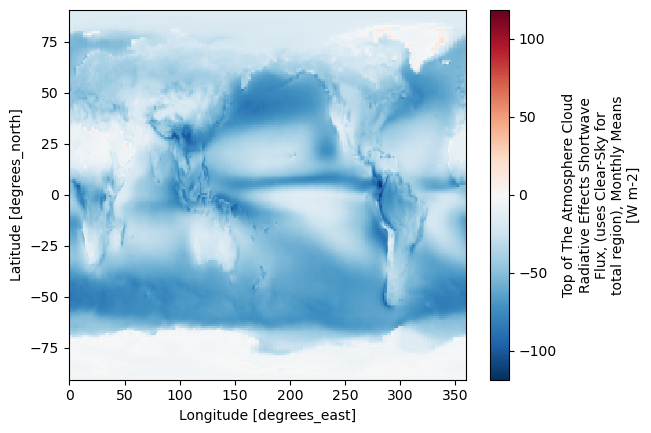

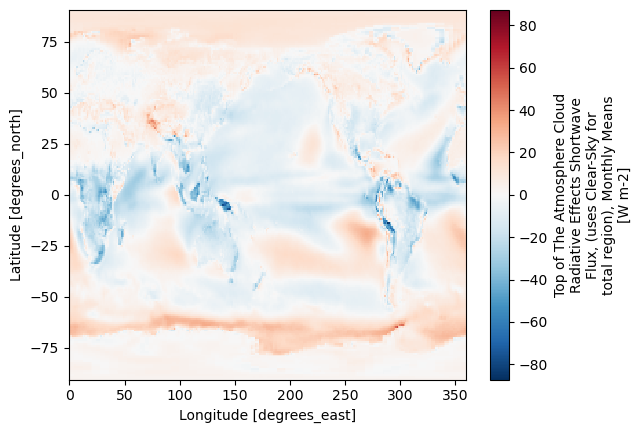

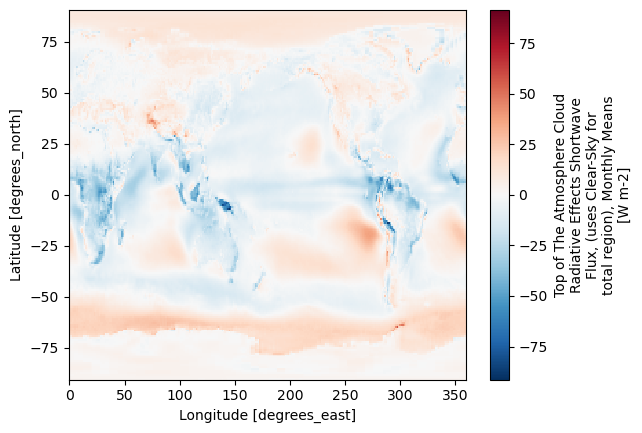

In [34]:
ds_ceres_ann_climo_taiesm_grid[varname_ceres].plot() ; plt.show()
da_AnnClimo_hist36yMceres.plot() ; plt.show()
da_AnnClimo_amipMceres.plot() ; plt.show()

## Select the SE Pacific region

In [85]:
def select_region(var_in,
                  #region="NE_CA",
                  region="SE_Pac"
                 ):
    
    if (region == "NE_CA"):
        #lowerlon=235; upperlon=245; lowerlat=28; upperlat=35
        lowerlon=225; upperlon=250; lowerlat=24; upperlat=40

    elif (region == "SE_Pac"):   # ref: Garreaud, RenéD., & Muñoz, R. (2004)
        lowerlon=275; upperlon=300; lowerlat=-40; upperlat=0
    
    elif (region == "SE_Pac_large"):
        lowerlon=260; upperlon=300; lowerlat=-40; upperlat=0

    elif (region == "DYCOMS"): 
        #--- reference: Eyeballing in Fig. 1 in Stevens et al. (2007, MWR)
        region_name = "DYCOMS (29.5-33N, 120-123.5W)"
        lowerlat =  29.5   # 29.5N
        upperlat =  33     # 33N
        lowerlon =  236.5  # 123.5W
        upperlon =  240    # 120W
    
    else:
        lowerlon=-1000; upperlon=1000; lowerlat=-1000; upperlat=1000
    
    lon_slice = slice(lowerlon, upperlon)
    lat_slice = slice(lowerlat, upperlat)
        
    var_region = var_in.sel(lat=lat_slice, lon=lon_slice)
    
    return var_region


In [86]:
var_ij_ceres = select_region(ds_ceres_ann_climo_taiesm_grid[varname_ceres])
var_ij_hist36Mceres = select_region(da_AnnClimo_hist36yMceres)
var_ij_amipMceres = select_region(da_AnnClimo_amipMceres) 

#var_ij_histMceres

# Plot functions

## ax_def_cn_map

In [70]:
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

def ax_def_cn_map (ax,
                   map_projection,
                   dict_cn_attrs=None):
    """    
    ----------------------
    Set attributes in cn_map plot using cartopy and matplotlib 

    Input arguments:
        ax: an Axes class variable
        map_projection: ccrs map projection class variable

    Return:
        update ax

    Example:
        map_projection = ccrs.PlateCarree(central_longitude=0)
        fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': map_projection})
        ax_def_cn_map(ax, map_projection)
      
    References:
      - Cartopy Tick Labels: https://scitools.org.uk/cartopy/docs/latest/gallery/gridlines_and_labels/tick_labels.html

    Date created: 2023-10-15
    ----------------------
    """
    
    #--- add coastline
    ax.add_feature(cfeature.COASTLINE)

    #--- add grid lines
    gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha = 1)  # add lat/lon grid lines
    gl.top_labels = False     # turn off labels on the top and right sides
    gl.right_labels = False
    
    #--- draw specific grid lines. I try to find a method to draw every grid line but not all labels. I couldn't find an easy way.
    #                              Perhaps the easiest one is to specify grid lines and let the program to determine the labels.
    #lon_grid_lines = [-124, -123, -122, -121, -120, -119, -118, -117, -116]
    #lon_grid_lines = [-124, -122, -120, -118, -116]
    #lon_grid_lines = np.arange(-140,-100,2)
    #lon_grid_lines = np.arange(-60,-100,5)
    
    #gl.xlocator = FixedLocator(lon_grid_lines)
    #gl.xformatter = LongitudeFormatter(zero_direction_label=True)

    #--- add title 
    fontsize=12
    ax.set_title(dict_cn_attrs['name'], loc='left', fontsize=fontsize)
    ax.set_title(dict_cn_attrs['units'], loc='right', fontsize=fontsize)


## set_dict_cn_attrs

In [80]:
from matplotlib.colors import BoundaryNorm

def set_dict_cn_attrs (varname):
    """    
    ----------------------
    Set contour attributes

    Input arguments:
        var: an Xarray.DataArray variable
        varname: variable name

    Return:
        1. return  a dictionary variable, dict_cn_attrs = {'cn_levels','cmap',label,name,units'}
 
 
    Example:
        gg = set_cn_attrs(var_tmp, 'tdt_dyn')
        print(gg['units'])

    References:
        colormaps:  https://matplotlib.org/stable/tutorials/colors/colormaps.html

    Date created: 2023-10-15
    ----------------------
    """
    
    #--- set cn levels
    tdt_dyn_cnlevels = np.arange(-25., 27.5, 2.5)
    qdt_dyn_cnlevels = np.arange(-10., 11, 1.)
    
    #---------------------
    # set cn attributes
    #---------------------
    if (varname == "skdfksjdkf"):
        cn_levels = tdt_dyn_cnlevels
        cmap="c1"
        label = "l1"
        name="n1"
        units="u1"

    elif (varname == "swup_toa"):
        #cn_levels = 15
        cn_levels = np.linspace(90, 160, 10)
        cmap="plasma"
        name = "TOA upward SW flux"
        units = r"$W m^{-2}$"
        label = name+" ("+units+")"
        #norm = BoundaryNorm(cn_levels, ncolors=len(cn_levels))

    elif (varname == "swcre_toa"):
        #cn_levels = 15
        cn_levels = np.arange(-100, -10, 5)
        cmap="viridis"
        name = "TOA SWCRE"
        units = r"$W m^{-2}$"
        label = name+" ("+units+")"
        #norm = BoundaryNorm(cn_levels, ncolors=len(cn_levels))

    elif (varname == "swcre_toa_diff"):
        #cn_levels = np.array([-50, -40, -30, -20, -15, -10, -5, 0, 
        #                         5, 10, 15, 20, 30, 40, 50])
        #cn_levels = np.linspace(-20, 20, 5)
        
        cn_levels = np.arange(-40,40,5)
        
        cmap="Spectral_r"
        name = "TOA SWCRE diff"
        units = r"$W m^{-2}$"
        label = name+" ("+units+")"
        #norm = BoundaryNorm(cn_levels, ncolors=len(cn_levels))

    elif (varname == "swcre_toa_diff_ceres"):
        #cn_levels = np.array([-50, -40, -30, -20, -15, -10, -5, 0, 
        #                         5, 10, 15, 20, 30, 40, 50])
        #cn_levels = np.linspace(-20, 20, 5)
        
        cn_levels = np.arange(-20,20,2)
        
        cmap="Spectral_r"
        name = "TOA SWCRE diff"
        units = r"$W m^{-2}$"
        label = name+" ("+units+")"
        #norm = BoundaryNorm(cn_levels, ncolors=len(cn_levels))    
    
    elif (varname == "swup_toa_diff"):
        cn_levels = np.array([-50, -40, -30, -20, -15, -10, -5, 0, 
                                 5, 10, 15, 20, 30, 40, 50])
        #cn_levels = np.linspace(-20, 20, 5)
        
        #cn_levels = np.arange(-120,140,10)
        
        cmap="Spectral_r"
        name = "TOA net downward SW flux diff"
        units = r"$W m^{-2}$"
        label = name+" ("+units+")"
        norm = BoundaryNorm(cn_levels, ncolors=len(cn_levels))

    else:
        cn_levels = np.array([15])
        cmap = "viridis"
        name = "Var"
        units = "units"
        label = name+" ("+units+")"

    #---------------------------------
    # return a dictionary variable
    #---------------------------------

    dict_cn_attrs = {
        'varname':varname,
        'cn_levels':cn_levels,
        'cmap': cmap,
        'label': label,
        'name': name,
        'units': units,
                  }
    
    return dict_cn_attrs

#-----------
# do_test
#-----------

#do_test=True
do_test=False

if (do_test):
    var_tmp = xr.DataArray(1)
    var_tmp.attrs['standard_name']="ggg"
    var_tmp.attrs['units']="KK"

    dict_cn_attrs = set_dict_cn_attrs('swabs_toa_diff')
    print(dict_cn_attrs)
    print(dict_cn_attrs['cmap'])

## plot_box

In [41]:
import matplotlib.patches as mpatches

def plot_box(ax, region="DYCOMS"):
    
    if (region == "DYCOMS"): 
        region_name = "DYCOMS (30-32.2N, 120-123.8W)"
        lowerlat =  30.    # 30N
        upperlat =  32.2   # 32.2N
        lowerlon =  236.2  # 123.8W
        upperlon =  240.   # 120W
    
    lon_range = upperlon - lowerlon
    lat_range = upperlat - lowerlat

    rect = mpatches.Rectangle((lowerlon, lowerlat), lon_range, lat_range, facecolor='none', edgecolor='cyan', linewidth=2, transform=map_projection)
    ax.add_patch(rect)

## plot_line

In [90]:
def plot_line(ax, loc="SE_upsidence"):

    if (loc == "SE_upsidence"):
        lowerlat =  -25.   # 25S
        upperlat =  -16.   # 16S
        lowerlon =  279.   # 71W
        upperlon =  289.   # 81W

    ax.plot(
        [lowerlon, upperlon],
        [lowerlat, upperlat],
        color='magenta', linewidth=4, linestyle="--",
        transform=map_projection
    )

## plot_cn_map

In [83]:
from matplotlib.ticker import FixedLocator

def plot_cn_map(ax, map_projection,
                var, varname,
                do_set_cn_attrs = True, 
                lb_orientation='horizontal', lb_shrink=0.9, lb_fontsize=8, 
               ):

    #-------------
    # plot cn_map
    #-------------
    
    if (do_set_cn_attrs):
        
        dict_cn_attrs = set_dict_cn_attrs(varname)  # set contour attributie
        #print(dict_cn_attrs)
        cn_map_region = ax.contourf(var.lon, var.lat, var, extend='both', transform=map_projection, levels=dict_cn_attrs['cn_levels'], cmap=dict_cn_attrs['cmap']) 

    else:
        #--- plot cn_map
        cn_map_region = ax.contourf(var.lon, var.lat, var, transform=map_projection) 

    #--- set cn_map attributes
    ax_def_cn_map(ax, map_projection, dict_cn_attrs=dict_cn_attrs)
    
    #--- plot the colorbar
    cbar = plt.colorbar(cn_map_region, ax=ax, orientation=lb_orientation, shrink=lb_shrink, pad=0.06) #, label=dict_cn_attrs['label'])
    #cbar.ax.tick_params(axis='both', which='major', labelsize=5)
    #cbar.set_label(label=dict_cn_attrs['label'], fontsize=lb_fontsize)
    
    #-------------
    # plot DYCOMS region
    #-------------    
    #plot_box(ax)
    plot_line(ax)

#-----------
# do_test
#-----------

do_test='111'
#do_test=False
    
if (do_test == '112'):
    map_projection = ccrs.PlateCarree(central_longitude=0)
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': map_projection})

    varname = 'swcre_toa'
    #plot_cn_map(ax, map_projection, var=var_july_climo_ceres, varname=varname, do_set_cn_attrs=True)
    plot_cn_map(ax, map_projection, var=var_july_2001_ceres, varname=varname, do_set_cn_attrs=True)
    #plot_cn_map(ax, map_projection, var=ds_taiesm1_hcast_day1_avg[varname_hcast], varname=varname, do_set_cn_attrs=True)

    #varname = 'swcre_toa_diff'
    #plot_cn_map(ax, map_projection, var=var_july_climo_amipMceres, varname=varname, do_set_cn_attrs=True)


## plot_cn_map_pcolormesh

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

from matplotlib.ticker import FixedLocator

def plot_cn_map_pcolormesh(ax, map_projection,
                var, varname,
                do_set_cn_attrs=True, 
                lb_orientation='horizontal', lb_shrink=0.9, lb_fontsize=8):

    #-------------
    # Plot cn_map using pcolormesh
    #-------------
    
    if do_set_cn_attrs:
        dict_cn_attrs = set_dict_cn_attrs(varname)  # Set contour attributes
        levels = dict_cn_attrs['cn_levels']
        #cmap = dict_cn_attrs['cmap']
        cmap = plt.get_cmap(dict_cn_attrs['cmap'])
        
        # Create a normalizer to match contour levels
        norm = mcolors.BoundaryNorm(levels, cmap.N)
        
        cn_map_region = ax.pcolormesh(var.lon, var.lat, var, 
                                      cmap=cmap, norm=norm, 
                                      shading='auto', transform=map_projection)

    else:
        cn_map_region = ax.pcolormesh(var.lon, var.lat, var, 
                                      shading='auto', transform=map_projection)

    # Set cn_map attributes
    ax_def_cn_map(ax, map_projection, dict_cn_attrs=dict_cn_attrs)

    # Plot the colorbar
    cbar = plt.colorbar(cn_map_region, ax=ax, orientation=lb_orientation, shrink=lb_shrink, pad=0.06)
    
    #-------------
    # Plot DYCOMS region
    #-------------    
    plot_box(ax)

#-----------
# do_test
#-----------

do_test='112'
#do_test=False
    
if (do_test == '111'):
    map_projection = ccrs.PlateCarree(central_longitude=0)
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': map_projection})

    #varname = 'swcre_toa'
    #plot_cn_map_pcolormesh(ax, map_projection, var=var_july_2001_ceres, varname=varname, do_set_cn_attrs=True)

    varname = 'swcre_toa_diff'
    plot_cn_map_pcolormesh(ax, map_projection, var=var_july_climo_amipMceres, varname=varname, do_set_cn_attrs=True)

# Plot

In [45]:
#print(var_july_2001_hcastD3Mceres.mean(['lat','lon']))

In [46]:
#var_july_2001_hcastD3Mceres.plot() ; plt.show()
#var_july_2001_hcastD5Mceres.plot() ; plt.show()

## CERES-EBAF

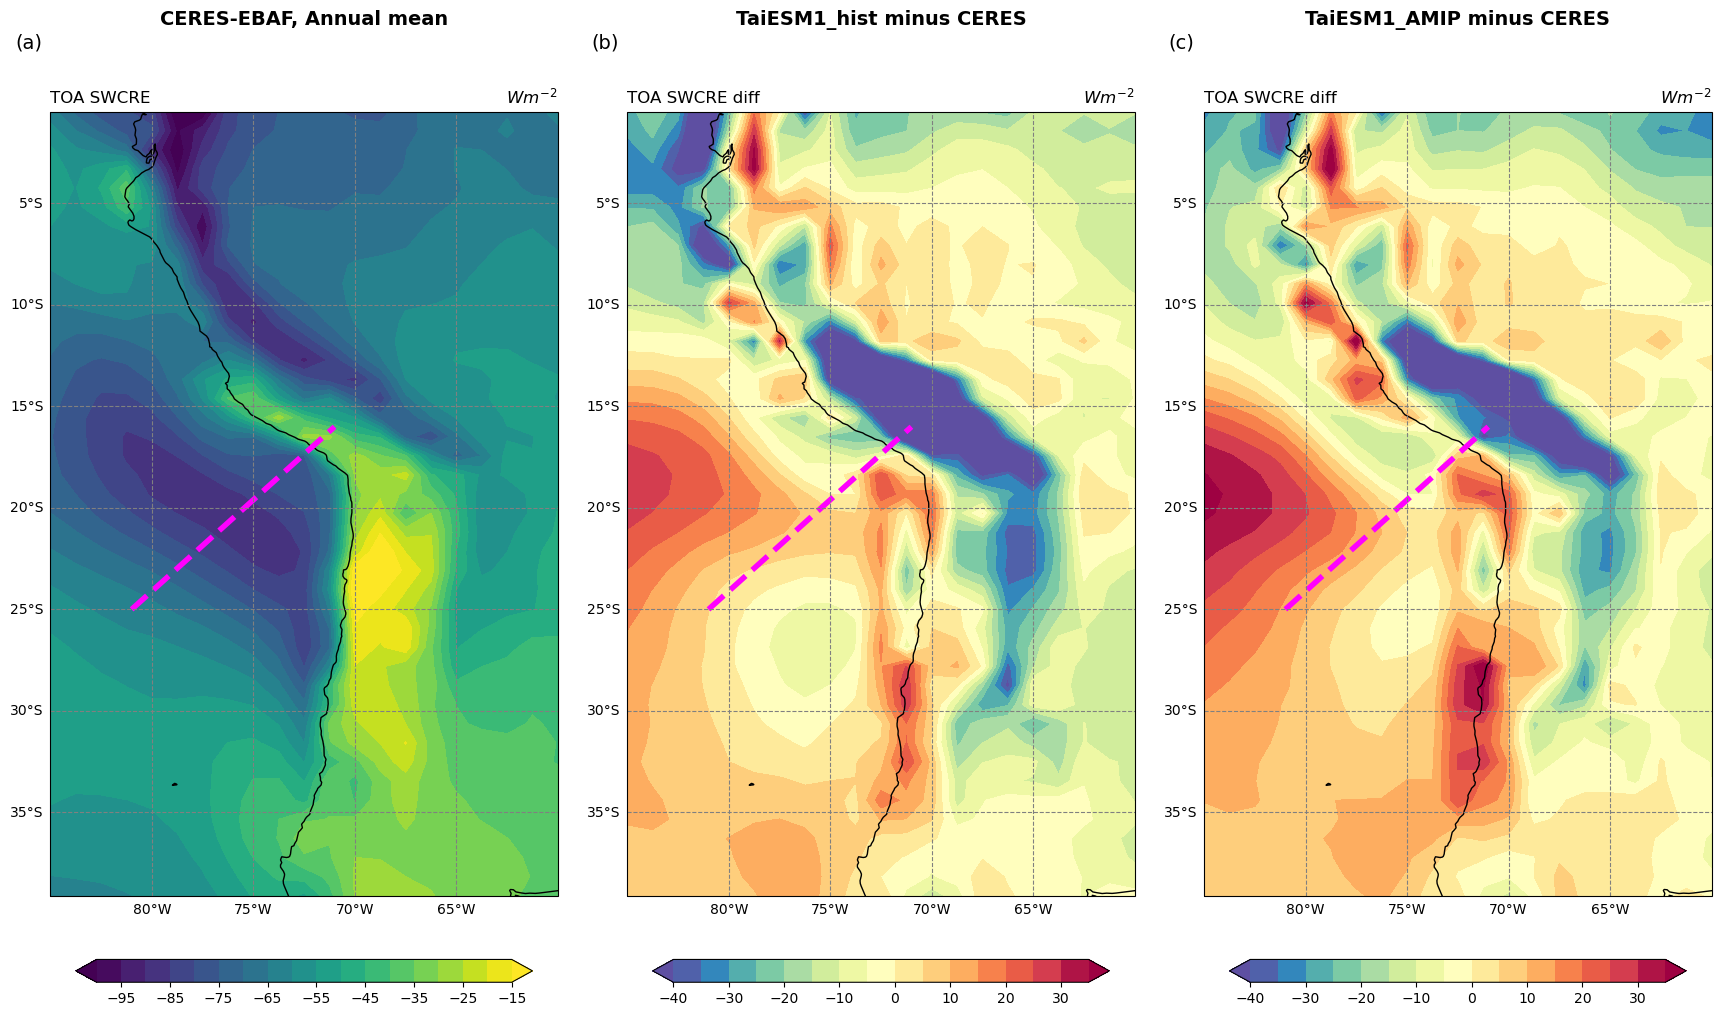

In [91]:
import cartopy.crs as ccrs

def set_main_title(ax, title, fontsize=14, y=1.1):
    ax.set_title(title, fontsize=fontsize, y=y, fontweight='bold')

def panel_string(ax, text, xx=-124, yy=29, color='c', fontsize=25):
    ax.text(xx, yy, text, color=color, fontsize=fontsize)

map_projection = ccrs.PlateCarree(central_longitude=0)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 12), subplot_kw={'projection': map_projection})

# Unpack the axes into individual variables
(ax1, ax2, ax3) = axes.flatten()

fig.tight_layout(pad=5)

lb_orientation='vertical'; lb_shrink=1.; lb_fontsize=12

varname_swcre = "swcre_toa"
varname_swcre_diff = "swcre_toa_diff"

plot_cn_map(ax1, map_projection, var=var_ij_ceres, varname=varname_swcre, do_set_cn_attrs=True)
plot_cn_map(ax2, map_projection, var=var_ij_hist36Mceres, varname=varname_swcre_diff, do_set_cn_attrs=True)
plot_cn_map(ax3, map_projection, var=var_ij_amipMceres, varname=varname_swcre_diff, do_set_cn_attrs=True)

set_main_title(ax1, "CERES-EBAF, Annual mean")
set_main_title(ax2, "TaiESM1_hist minus CERES")
set_main_title(ax3, "TaiESM1_AMIP minus CERES")

#--- add labels, (a)...
import string
def add_labels_to_subplots(axes, num_labels=20, fontsize=14):
    # Generate labels from "(a)" to the specified number of labels
    labels = [f"({char})" for char in string.ascii_lowercase[:num_labels]]  

    for i, ax in enumerate(axes):
        if i < len(labels):  # Ensure we don't exceed the number of labels
            ax.text(-0.07, 1.1, labels[i], transform=ax.transAxes, fontsize=fontsize, verticalalignment='top')

axes = [ax1, ax2, ax3] #, ax4, ax5, ax6]
add_labels_to_subplots(axes)            
#panel_string(ax1, "(a)")